In [1]:
import pandas as pd
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')

from scipy.stats import boxcox
import numpy as np

# necessary libraries for PCA
from sklearn.preprocessing import RobustScaler
from sklearn import decomposition  
from sklearn.preprocessing import scale  
from sklearn import preprocessing 
from sklearn import linear_model
from sklearn import model_selection

from scipy import stats

## Calculate composite score for all MSOAs 

### Proxy Variables for Part One

In [2]:
swandlondon_core = pd.read_csv('output/swandlondon_core.csv')

In [3]:
swandlondon_core.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1211 entries, 0 to 1210
Data columns (total 45 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   MSOA11CD                             1211 non-null   object 
 1   MSOA11NM                             1211 non-null   object 
 2   LAD11CD                              1211 non-null   object 
 3   LAD11NM                              1211 non-null   object 
 4   RGN11CD                              1211 non-null   object 
 5   RGN11NM                              1211 non-null   object 
 6   MSOA01CD                             1211 non-null   object 
 7   MSOA01NM                             1211 non-null   object 
 8   CHGIND                               1211 non-null   object 
 9   ratio_la_median_price_2001           1211 non-null   float64
 10  ratio_la_median_price_2011           1211 non-null   float64
 11  ratio_r_median_price_2001     

In [4]:
extrac1_cols=list(swandlondon_core.iloc[:,[0,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24]].columns)
swandlondon_extract1=swandlondon_core[extrac1_cols].copy()

In [5]:
swandlondon_extract1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1211 entries, 0 to 1210
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   MSOA11CD                     1211 non-null   object 
 1   ratio_la_median_price_2001   1211 non-null   float64
 2   ratio_la_median_price_2011   1211 non-null   float64
 3   ratio_r_median_price_2001    1211 non-null   float64
 4   ratio_r_median_price_2011    1211 non-null   float64
 5   ratio_la_earnings_2001       1211 non-null   float64
 6   ratio_la_earnings_2011       1211 non-null   float64
 7   ratio_r_earnings_2001        1211 non-null   float64
 8   ratio_r_earnings_2011        1211 non-null   float64
 9   ratio_la_nssec_2001          1211 non-null   float64
 10  ratio_la_nssec_2011          1211 non-null   float64
 11  ratio_r_nssec_2001           1211 non-null   float64
 12  ratio_r_nssec_2011           1211 non-null   float64
 13  ratio_la_qualifica

In [6]:
swandlondon_extract1.head()

,MSOA11CD,ratio_la_median_price_2001,ratio_la_median_price_2011,ratio_r_median_price_2001,ratio_r_median_price_2011,ratio_la_earnings_2001,ratio_la_earnings_2011,ratio_r_earnings_2001,ratio_r_earnings_2011,ratio_la_nssec_2001,ratio_la_nssec_2011,ratio_r_nssec_2001,ratio_r_nssec_2011,ratio_la_qualification_2001,ratio_la_qualification_2011,ratio_r_qualification_2001,ratio_r_qualification_2011
0,E02003122,1.944769,1.246479,1.295337,0.956757,1.0,1.177910,0.827268,0.991131,1.302179,1.408462,1.050907,1.107387,1.268738,1.245506,0.908463,0.976193
1,E02003123,0.824582,1.024613,0.549223,0.786459,1.0,0.941803,0.827268,0.792463,0.712490,0.815258,0.575006,0.640987,0.660445,0.705638,0.472903,0.553059
2,E02003124,0.855698,0.827465,0.569948,0.635135,1.0,0.899845,0.827268,0.757158,0.845831,0.821287,0.682617,0.645727,0.678934,0.716811,0.486142,0.561816
3,E02003125,0.762349,0.855634,0.507772,0.656757,1.0,0.929999,0.827268,0.782531,0.726167,0.754775,0.586044,0.593433,0.467399,0.624349,0.334675,0.489347
4,E02003126,0.855309,0.880282,0.569689,0.675676,1.0,0.952639,0.827268,0.801581,0.869677,0.835468,0.701862,0.656877,0.736672,0.747830,0.527485,0.586129


In [7]:
# check the distribution of proxy variables (excluding MSOA code)

swandlondon_extract1__distribution_la = swandlondon_extract1.iloc[:,[1,2,5,6,9,10,13,14]]

swandlondon_extract1__distribution_r = swandlondon_extract1.iloc[:,[3,4,7,8,11,12,15,16]]

[Text(0, 0, 'ratio_r_median_price_2001'),
 Text(1, 0, 'ratio_r_median_price_2011'),
 Text(2, 0, 'ratio_r_earnings_2001'),
 Text(3, 0, 'ratio_r_earnings_2011'),
 Text(4, 0, 'ratio_r_nssec_2001'),
 Text(5, 0, 'ratio_r_nssec_2011'),
 Text(6, 0, 'ratio_r_qualification_2001'),
 Text(7, 0, 'ratio_r_qualification_2011')]

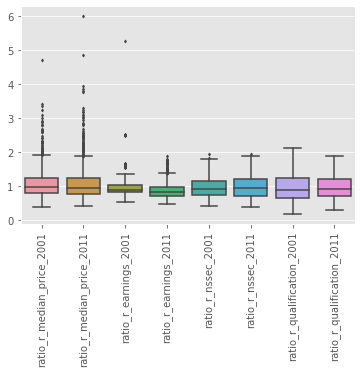

In [8]:
# ratio by region
ax = sns.boxplot( data=swandlondon_extract1__distribution_r,fliersize=2)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

#plt.savefig('tplot/p1-region-box.png',dpi = 200,bbox_inches = 'tight')

[Text(0, 0, 'ratio_la_median_price_2001'),
 Text(1, 0, 'ratio_la_median_price_2011'),
 Text(2, 0, 'ratio_la_earnings_2001'),
 Text(3, 0, 'ratio_la_earnings_2011'),
 Text(4, 0, 'ratio_la_nssec_2001'),
 Text(5, 0, 'ratio_la_nssec_2011'),
 Text(6, 0, 'ratio_la_qualification_2001'),
 Text(7, 0, 'ratio_la_qualification_2011')]

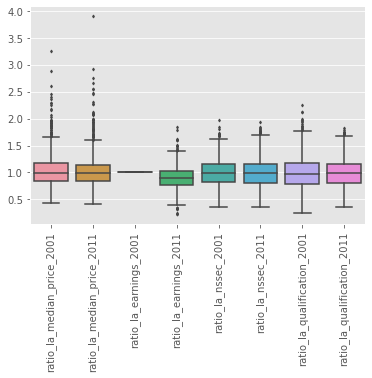

In [9]:
# ratio by la
ax = sns.boxplot( data=swandlondon_extract1__distribution_la,fliersize=2)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

#plt.savefig('tplot/p1-la-box.png',dpi = 200,bbox_inches = 'tight')

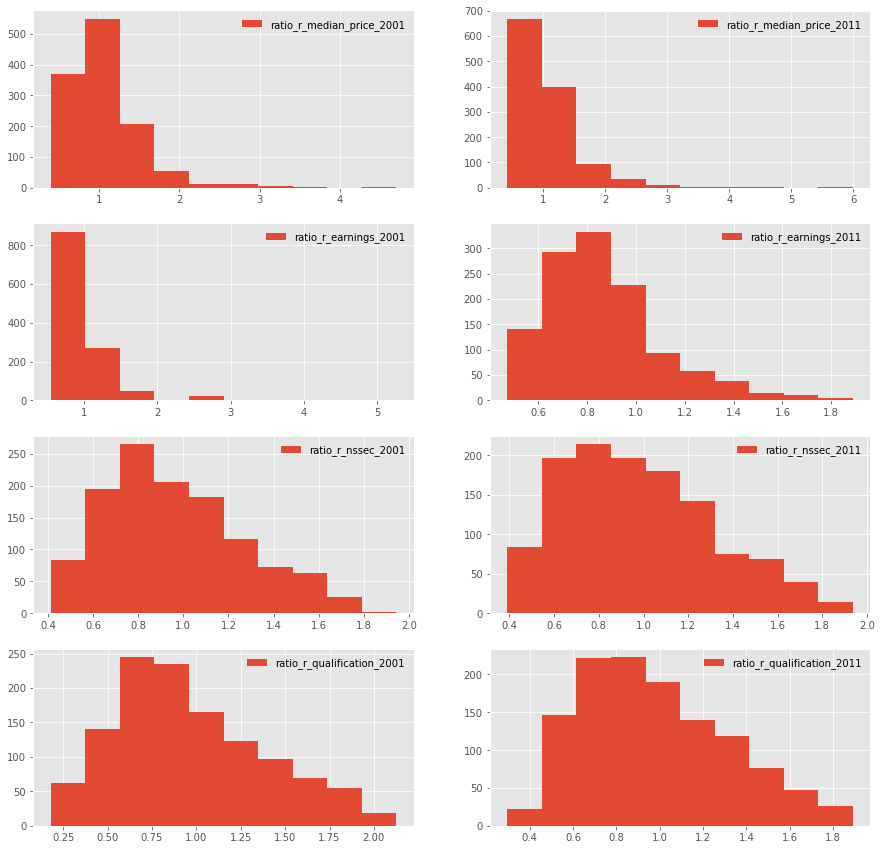

In [10]:
# creating histogram for each variable (Region scaling)  to explore their underlying distributions

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 15))

counter = 0
for i in range(4):
    for j in range(2):

        ax = axes[i][j]

        # Plot when we have data
        if counter < len(swandlondon_extract1__distribution_r.columns):

            ax.hist(swandlondon_extract1__distribution_r[swandlondon_extract1__distribution_r.columns[counter]], label='{}'.format(swandlondon_extract1__distribution_r.columns[counter]))
            leg = ax.legend(loc='upper right')
            leg.draw_frame(False)

        # Remove axis when we no longer have data
        else:
            ax.set_axis_off()

        counter += 1

#plt.savefig('tplot/p1-r-his.png',dpi = 200,bbox_inches = 'tight')
plt.show()

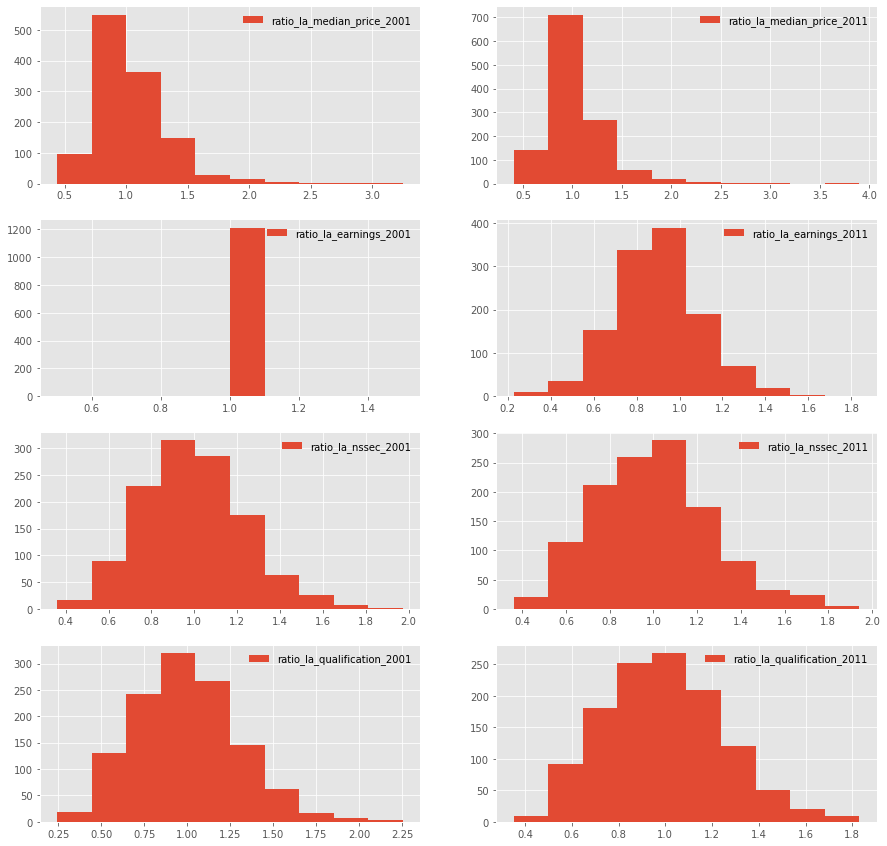

In [11]:
# creating histogram for each variable (LA scaling) to explore their underlying distributions

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 15))

counter = 0
for i in range(4):
    for j in range(2):

        ax = axes[i][j]

        # Plot when we have data
        if counter < len(swandlondon_extract1__distribution_la.columns):

            ax.hist(swandlondon_extract1__distribution_la[swandlondon_extract1__distribution_la.columns[counter]], label='{}'.format(swandlondon_extract1__distribution_la.columns[counter]))
            leg = ax.legend(loc='upper right')
            leg.draw_frame(False)

        # Remove axis when we no longer have data
        else:
            ax.set_axis_off()

        counter += 1

#plt.savefig('tplot/p1-la-his.png',dpi = 200,bbox_inches = 'tight')
plt.show()

### Data Transformation, Re-scaling and PCA

What did I do in this section:

1. Transform highly skewed variable. Consider which transformation approaches to use: untransformed, Box Cox or Log
2. Consider whether to scale the proxy varibales before PCA. 

three approaches * (to scale or not sclae) = 6 scenarios

Check the explained variance of the 1st componet for the 6scenarios

In [12]:
swandlondon_extract1_la=swandlondon_extract1.iloc[:,[0,1,2,5,6,9,10,13,14]].copy()

In [13]:
swandlondon_extract1_la.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1211 entries, 0 to 1210
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   MSOA11CD                     1211 non-null   object 
 1   ratio_la_median_price_2001   1211 non-null   float64
 2   ratio_la_median_price_2011   1211 non-null   float64
 3   ratio_la_earnings_2001       1211 non-null   float64
 4   ratio_la_earnings_2011       1211 non-null   float64
 5   ratio_la_nssec_2001          1211 non-null   float64
 6   ratio_la_nssec_2011          1211 non-null   float64
 7   ratio_la_qualification_2001  1211 non-null   float64
 8   ratio_la_qualification_2011  1211 non-null   float64
dtypes: float64(8), object(1)
memory usage: 85.3+ KB


In [14]:
# from the distribution check above, the median housing price is heavily positive skewed.
df_transformed = swandlondon_extract1_la [[ 'ratio_la_median_price_2011','ratio_la_median_price_2001']]

In [15]:
#Box-Cox Transform
price01, lmd01a = boxcox(df_transformed['ratio_la_median_price_2001']) 
price11 = boxcox(df_transformed['ratio_la_median_price_2011'], lmbda=lmd01a)

#Log transform
price01l = np.log(df_transformed['ratio_la_median_price_2001']) 
price11l = np.log(df_transformed['ratio_la_median_price_2011'])

In [16]:
#code reference:https://github.com/jreades/urb-studies-predicting-gentrification/blob/master/04-Scoring%20Neighbourhoods.ipynb

#choose one
to_use = 'Box-Cox' # Choices: ['Untransformed','Box-Cox','Log']

if to_use == 'Untransformed':
    swandlondon_la_pca=swandlondon_extract1_la.copy()
    
elif to_use == 'Box-Cox':
    swandlondon_la_pca=swandlondon_extract1_la.copy()
    swandlondon_la_pca['ratio_la_median_price_2001']=price01
    swandlondon_la_pca['ratio_la_median_price_2011']=price11
    
elif to_use == 'Log':
    swandlondon_la_pca=swandlondon_extract1_la.copy()
    swandlondon_la_pca['ratio_la_median_price_2001']=price01l
    swandlondon_la_pca['ratio_la_median_price_2011']=price11l
    

In [17]:
df_scaling = swandlondon_la_pca.set_index('MSOA11CD')

In [18]:
df_scaling.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1211 entries, E02003122 to E02006882
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ratio_la_median_price_2001   1211 non-null   float64
 1   ratio_la_median_price_2011   1211 non-null   float64
 2   ratio_la_earnings_2001       1211 non-null   float64
 3   ratio_la_earnings_2011       1211 non-null   float64
 4   ratio_la_nssec_2001          1211 non-null   float64
 5   ratio_la_nssec_2011          1211 non-null   float64
 6   ratio_la_qualification_2001  1211 non-null   float64
 7   ratio_la_qualification_2011  1211 non-null   float64
dtypes: float64(8)
memory usage: 85.1+ KB


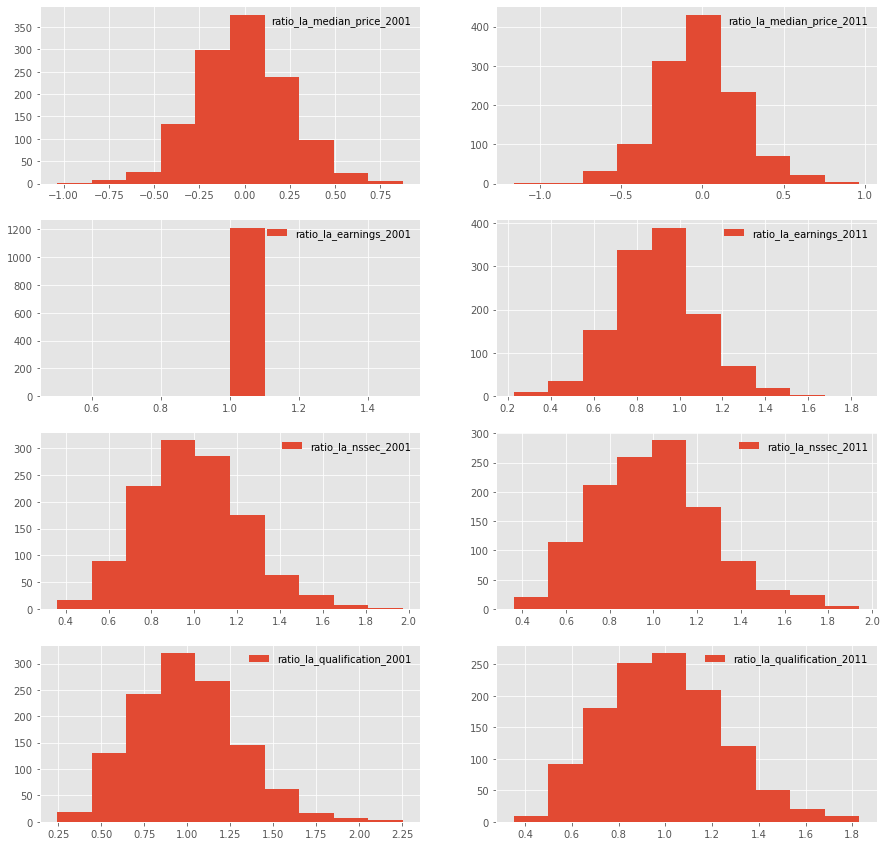

In [19]:
# creating histogram for each variable to explore their underlying distributions

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 15))

counter = 0
for i in range(4):
    for j in range(2):

        ax = axes[i][j]

        # Plot when we have data
        if counter < len(df_scaling.columns):

            ax.hist(df_scaling[df_scaling.columns[counter]], label='{}'.format(df_scaling.columns[counter]))
            leg = ax.legend(loc='upper right')
            leg.draw_frame(False)

        # Remove axis when we no longer have data
        else:
            ax.set_axis_off()

        counter += 1

#plt.savefig('tplot/p1-la-boxcox-his.png',dpi = 200,bbox_inches = 'tight')
plt.show()

In [20]:
#pca part code reference:https://github.com/jytg17/Unpacking-the-Nuances-of-Londons-Neighbourhood-Change-Gentrification-Trajectories-codes/blob/master/2%20Scoring%20Analysis.ipynb

In [21]:
# split 2001 data from 2011 data
df_scaling_2001 = df_scaling.iloc[:,[0,2,4,6]].copy()
df_scaling_2011 = df_scaling.iloc[:,[1,3,5,7]].copy()

# stacking the 2001 data vertically with 2011 data
values_2001 = df_scaling_2001.values
values_2011 = df_scaling_2011.values
stacked_df = np.concatenate((values_2001, values_2011), axis=0)


In [22]:
df_scaling_2001.head()

,ratio_la_median_price_2001,ratio_la_earnings_2001,ratio_la_nssec_2001,ratio_la_qualification_2001
MSOA11CD,,,,
E02003122,0.559537,1.0,1.302179,1.268738
E02003123,-0.203197,1.0,0.712490,0.660445
E02003124,-0.162528,1.0,0.845831,0.678934
E02003125,-0.292066,1.0,0.726167,0.467399
E02003126,-0.163022,1.0,0.869677,0.736672


In [23]:
values_2001


array([[ 0.55953693,  1.        ,  1.30217932,  1.26873841],
       [-0.20319689,  1.        ,  0.71248995,  0.66044495],
       [-0.16252801,  1.        ,  0.84583093,  0.67893429],
       ...,
       [ 0.26815363,  1.        ,  1.00829955,  1.00396023],
       [ 0.01973753,  1.        ,  1.03248424,  1.11060484],
       [ 0.09109363,  1.        ,  0.87213857,  0.85637993]])

In [24]:
# checking for NaN values before scaling and transforming
np.isnan(stacked_df).sum()

0

In [25]:
# scaling the stacked data using RobustScaler
Robust_transformer = RobustScaler().fit(stacked_df)
Robust_transformer_df = Robust_transformer.transform(stacked_df)

In [26]:
# carry out PCA to derive only the 1st principal component---scaled data

pca = decomposition.PCA(n_components=1)             
pca.fit(Robust_transformer_df)                      
PCA_scores = pd.DataFrame(pca.transform(Robust_transformer_df))  

print("Explained variance of the SES score is: {0:6.5f}".format(pca.explained_variance_ratio_[0]))

Explained variance of the SES score is: 0.72242


In [27]:
# what if one wanted to find all principal components?---scaled data

pca_all = decomposition.PCA()             
pca_all.fit(Robust_transformer_df)                      
print(pca_all.explained_variance_ratio_)

[0.72242367 0.20127339 0.06256128 0.01374165]


In [28]:
# carry out PCA to derive only the 1st principal component----not scaled data

pca = decomposition.PCA(n_components=1)             
pca.fit(stacked_df)                      
PCA_scores = pd.DataFrame(pca.transform(stacked_df))  

print("Explained variance of the SES score is: {0:6.5f}".format(pca.explained_variance_ratio_[0]))

Explained variance of the SES score is: 0.77839


In [29]:
# what if one wanted to find all principal components?----not scaled data

pca_all = decomposition.PCA()             
pca_all.fit(stacked_df)                      
print(pca_all.explained_variance_ratio_)

[0.77838525 0.11860959 0.07537652 0.02762864]


### The results of this part are as follow:

Explained variances for each scenarios:

1. Untransformed, Scaled:0.69188
2. Untransformed, Not Scaled:0.75166
3. Box-Cox Transformed, Scaled:0.72242
4. Box-Cox Transformed, Not Scaled:0.77839 (Best Performance)
5. Log Transformed, Scaled:0.71807
6. Log Transformed, Not Scaled:0.77542


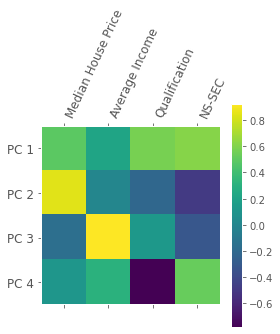

In [30]:
# visualise the constituents of each PC using heatmap

features = ["Median House Price", "Average Income", "Qualification", "NS-SEC"]

plt.matshow(pca_all.components_,cmap='viridis')
plt.yticks([0,1,2,3],['PC 1','PC 2','PC 3', 'PC 4'],fontsize=12)
plt.colorbar()
plt.xticks(range(len(features)),features,rotation=65,ha='left',fontsize=12)
plt.grid(b=None, which = "major")

#plt.savefig('tplot/p1-pca-heat.png',dpi = 200,bbox_inches = 'tight')
plt.show()




### Composite score

In [31]:
# extracting scores for the respective years
PCA_2001 = pd.DataFrame(PCA_scores.iloc[0:len(df_scaling_2001),])
PCA_2011 = pd.DataFrame(PCA_scores.iloc[len(df_scaling_2001):,])

In [32]:
PCA_2001.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1211 entries, 0 to 1210
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1211 non-null   float64
dtypes: float64(1)
memory usage: 9.6 KB


In [33]:
PCA_2011.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1211 entries, 1211 to 2421
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1211 non-null   float64
dtypes: float64(1)
memory usage: 9.6 KB


In [34]:
# renaming their column titles
PCA_2001 = PCA_2001.rename(columns={0: "Score_2001"})
PCA_2011 = PCA_2011.rename(columns={0: "Score_2011"})

In [35]:
# attaching the 2001 and 2011 scores to their respective MSOAs in the main dataframe (df_score)
df_score = df_scaling.reset_index()

df_score["Score_2001"] = PCA_2001[:]


PCA_2011 = PCA_2011.reset_index(drop=True)
df_score["Score_2011"] = PCA_2011

In [36]:
# main dataframe
df_score

,MSOA11CD,ratio_la_median_price_2001,ratio_la_median_price_2011,ratio_la_earnings_2001,ratio_la_earnings_2011,ratio_la_nssec_2001,ratio_la_nssec_2011,ratio_la_qualification_2001,ratio_la_qualification_2011,Score_2001,Score_2011
0,E02003122,0.559537,0.207816,1.0,1.177910,1.302179,1.408462,1.268738,1.245506,0.639471,0.550915
1,E02003123,-0.203197,0.024157,1.0,0.941803,0.712490,0.815258,0.660445,0.705638,-0.451096,-0.264139
2,E02003124,-0.162528,-0.199330,1.0,0.899845,0.845831,0.821287,0.678934,0.716811,-0.342667,-0.373374
3,E02003125,-0.292066,-0.162610,1.0,0.929999,0.726167,0.754775,0.467399,0.624349,-0.605492,-0.443801
4,E02003126,-0.163022,-0.131970,1.0,0.952639,0.869677,0.835468,0.736672,0.747830,-0.293751,-0.301495
...,...,...,...,...,...,...,...,...,...,...,...
1206,E02006840,0.023800,0.114144,1.0,0.968616,1.126047,1.181341,1.120533,1.208793,0.181964,0.305920
1207,E02006924,0.167115,0.244759,1.0,0.847176,1.044566,0.955430,1.250526,1.097544,0.285492,0.145770
1208,E02006925,0.268154,0.249418,1.0,0.942860,1.008300,1.030513,1.003960,1.003886,0.163383,0.154599
1209,E02006927,0.019738,0.109976,1.0,1.009995,1.032484,1.197407,1.110605,1.117053,0.119853,0.265801


In [37]:
df_score.to_csv('output/df_score.csv',index=False)

---

## Differentiate broad neighbourhood change states of MSOAs

In [38]:
df_score = pd.read_csv('output/df_score.csv')

In [39]:
#add the name of the MSOA and corresponding LA and Region to the dataset 
mosa11_to_la=pd.read_csv('data00/msoa11_to_la.csv')

df_score = df_score.merge(mosa11_to_la, on='MSOA11CD', how='left')

In [40]:
df_score.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1211 entries, 0 to 1210
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   MSOA11CD                     1211 non-null   object 
 1   ratio_la_median_price_2001   1211 non-null   float64
 2   ratio_la_median_price_2011   1211 non-null   float64
 3   ratio_la_earnings_2001       1211 non-null   float64
 4   ratio_la_earnings_2011       1211 non-null   float64
 5   ratio_la_nssec_2001          1211 non-null   float64
 6   ratio_la_nssec_2011          1211 non-null   float64
 7   ratio_la_qualification_2001  1211 non-null   float64
 8   ratio_la_qualification_2011  1211 non-null   float64
 9   Score_2001                   1211 non-null   float64
 10  Score_2011                   1211 non-null   float64
 11  MSOA11NM                     1211 non-null   object 
 12  LAD11CD                      1211 non-null   object 
 13  LAD11NM           

In [41]:
# assigning ranks to MSOA based on their 2001 & 2011 scores
df_score["rank_2001"] = df_score["Score_2001"].rank(ascending=False)
df_score["rank_2011"] = df_score["Score_2011"].rank(ascending=False)

# quantifying the change in MSOA's ranks between the 2 years
df_score["rank_chg"] = df_score["rank_2001"] - df_score["rank_2011"]

In [42]:
# descriptive stats of rank changes
df_score["rank_chg"].describe()

count    1211.000000
mean        0.000000
std       100.418439
min      -529.000000
25%       -53.000000
50%        -2.000000
75%        54.000000
max       853.000000
Name: rank_chg, dtype: float64

array([[<AxesSubplot:title={'center':'rank_chg'}>]], dtype=object)

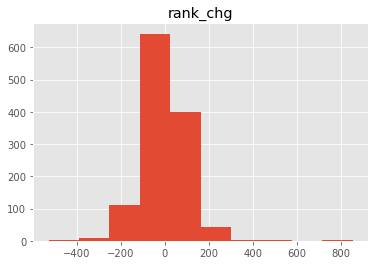

In [43]:
df_score.hist(column='rank_chg')

In [44]:
# compute z-scores of rank changes

from scipy.stats import zscore
df_score["rank_z_score"] = df_score[["rank_chg"]].apply(zscore)

In [45]:
#  changes in MSOAs' scores
df_score["score_chg"]= df_score["Score_2011"] - df_score["Score_2001"]

In [46]:
# descriptive stats of score changes
df_score["score_chg"].describe()

count    1211.000000
mean       -0.024279
std         0.123900
min        -0.538718
25%        -0.106270
50%        -0.026086
75%         0.052432
max         0.869579
Name: score_chg, dtype: float64

array([[<AxesSubplot:title={'center':'score_chg'}>]], dtype=object)

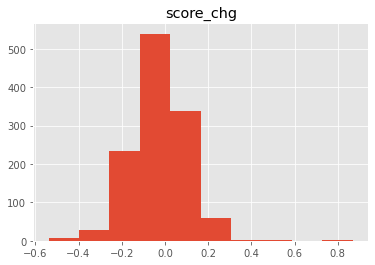

In [47]:
matplotlib.style.use('ggplot')
df_score.hist(column='score_chg')
#plt.savefig('tplot/p1-scorechage-his.png',dpi = 200,bbox_inches = 'tight')

In [48]:
# compute z-scores of score changes
df_score["score_z_score"] = df_score[["score_chg"]].apply(zscore)

In [49]:
##Yee and Dennett (2020)'s strategy

# assign MSOA status based on: 
# (1) z-scores of rank changes (z<-1 signify that n'hood is in decline (DEC), -1<z<1 signifies that n'hood is stable (STB), z>1 signifies that n'hood is in ascension (ASC))
# (2) changes in MSOAs' scores are within the top or bottom 5th percentile (top 5th percentile: 'ASC' and bottom 5th percentile: 'DEC')

df_score["status"] = "STB"

for i in range(len(df_score)):
    if df_score["rank_z_score"][i] > 1 or df_score["score_chg"][i] > df_score["score_chg"].quantile(0.95):
        df_score["status"][i] = "ASC"
    elif df_score["rank_z_score"][i] < -1 or df_score["score_chg"][i] < df_score["score_chg"].quantile(0.05):
        df_score["status"][i] = "DEC"

/opt/conda/envs/sds2020/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/opt/conda/envs/sds2020/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


In [50]:
#My strategy

df_score["status2"] = "STB"

for i in range(len(df_score)):
    if df_score["score_z_score"][i]> 1:
        df_score["status2"][i] = "ASC"
    elif df_score["score_z_score"][i]< -1:
        df_score["status2"][i] = "DEC"

/opt/conda/envs/sds2020/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/opt/conda/envs/sds2020/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [51]:
# check dataframe
# settings to display all columns
pd.set_option("display.max_columns", None)
df_score.head(10)

,MSOA11CD,ratio_la_median_price_2001,ratio_la_median_price_2011,ratio_la_earnings_2001,ratio_la_earnings_2011,ratio_la_nssec_2001,ratio_la_nssec_2011,ratio_la_qualification_2001,ratio_la_qualification_2011,Score_2001,Score_2011,MSOA11NM,LAD11CD,LAD11NM,RGN11CD,RGN11NM,rank_2001,rank_2011,rank_chg,rank_z_score,score_chg,score_z_score,status,status2
0,E02003122,0.559537,0.207816,1.0,1.177910,1.302179,1.408462,1.268738,1.245506,0.639471,0.550915,Plymouth 001,E06000026,Plymouth,E12000009,South West,87.0,125.0,-38.0,-0.378573,-0.088555,-0.518994,STB,STB
1,E02003123,-0.203197,0.024157,1.0,0.941803,0.712490,0.815258,0.660445,0.705638,-0.451096,-0.264139,Plymouth 002,E06000026,Plymouth,E12000009,South West,1058.0,861.0,197.0,1.962602,0.186957,1.705592,ASC,ASC
2,E02003124,-0.162528,-0.199330,1.0,0.899845,0.845831,0.821287,0.678934,0.716811,-0.342667,-0.373374,Plymouth 003,E06000026,Plymouth,E12000009,South West,973.0,942.0,31.0,0.308836,-0.030707,-0.051903,STB,STB
3,E02003125,-0.292066,-0.162610,1.0,0.929999,0.726167,0.754775,0.467399,0.624349,-0.605492,-0.443801,Plymouth 004,E06000026,Plymouth,E12000009,South West,1142.0,1003.0,139.0,1.384780,0.161691,1.501588,ASC,ASC
4,E02003126,-0.163022,-0.131970,1.0,0.952639,0.869677,0.835468,0.736672,0.747830,-0.293751,-0.301495,Plymouth 005,E06000026,Plymouth,E12000009,South West,929.0,891.0,38.0,0.378573,-0.007744,0.133511,STB,STB
5,E02003127,-0.219061,-0.243007,1.0,0.844138,0.670769,0.696324,0.500054,0.539160,-0.581349,-0.588008,Plymouth 006,E06000026,Plymouth,E12000009,South West,1131.0,1100.0,31.0,0.308836,-0.006659,0.142270,STB,STB
6,E02003128,0.148110,-0.149314,1.0,0.914192,0.690620,0.814331,0.518831,0.692137,-0.376778,-0.364690,Plymouth 007,E06000026,Plymouth,E12000009,South West,1007.0,935.0,72.0,0.717296,0.012088,0.293636,STB,STB
7,E02003129,0.259056,0.207816,1.0,1.101732,1.336337,1.328560,1.108824,1.096815,0.412547,0.397245,Plymouth 008,E06000026,Plymouth,E12000009,South West,188.0,196.0,-8.0,-0.079700,-0.015302,0.072481,STB,STB
8,E02003130,-0.303960,-0.136266,1.0,0.900486,0.690717,0.722734,0.513707,0.602866,-0.603454,-0.468790,Plymouth 009,E06000026,Plymouth,E12000009,South West,1140.0,1027.0,113.0,1.125756,0.134664,1.283361,ASC,ASC
9,E02003131,-0.182573,-0.149314,1.0,0.924723,0.779485,0.845181,0.570643,0.626732,-0.457267,-0.384707,Plymouth 010,E06000026,Plymouth,E12000009,South West,1062.0,955.0,107.0,1.065982,0.072560,0.781914,ASC,STB


In [52]:
# size of different MSOA status groups--Yee and Dennett (2020)'s strategy
df_score.groupby(df_score["status"]).size()

status
ASC    172
DEC    167
STB    872
dtype: int64

In [53]:
# size of different MSOA status groups--my strategy
df_score.groupby(df_score["status2"]).size()

status2
ASC    177
DEC    169
STB    865
dtype: int64

In [54]:
# output to file
df_score.to_csv('output/pca_score_analysis.csv',index=False)

---

## Check the correlation between SHO level and different neighbourhood change status

In [55]:
swandlondon_pca = pd.read_csv('output/pca_score_analysis.csv')

In [56]:
swandlondon_pca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1211 entries, 0 to 1210
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   MSOA11CD                     1211 non-null   object 
 1   ratio_la_median_price_2001   1211 non-null   float64
 2   ratio_la_median_price_2011   1211 non-null   float64
 3   ratio_la_earnings_2001       1211 non-null   float64
 4   ratio_la_earnings_2011       1211 non-null   float64
 5   ratio_la_nssec_2001          1211 non-null   float64
 6   ratio_la_nssec_2011          1211 non-null   float64
 7   ratio_la_qualification_2001  1211 non-null   float64
 8   ratio_la_qualification_2011  1211 non-null   float64
 9   Score_2001                   1211 non-null   float64
 10  Score_2011                   1211 non-null   float64
 11  MSOA11NM                     1211 non-null   object 
 12  LAD11CD                      1211 non-null   object 
 13  LAD11NM           

In [57]:
cor1=swandlondon_pca.iloc[:,[0,9,10,20,21,16,17,18,19,23]].copy()

In [58]:
cor1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1211 entries, 0 to 1210
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSOA11CD       1211 non-null   object 
 1   Score_2001     1211 non-null   float64
 2   Score_2011     1211 non-null   float64
 3   score_chg      1211 non-null   float64
 4   score_z_score  1211 non-null   float64
 5   rank_2001      1211 non-null   float64
 6   rank_2011      1211 non-null   float64
 7   rank_chg       1211 non-null   float64
 8   rank_z_score   1211 non-null   float64
 9   status2        1211 non-null   object 
dtypes: float64(8), object(2)
memory usage: 94.7+ KB


In [59]:
swandlondon_core = pd.read_csv('output/swandlondon_core.csv')

In [60]:
swandlondon_core.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1211 entries, 0 to 1210
Data columns (total 45 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   MSOA11CD                             1211 non-null   object 
 1   MSOA11NM                             1211 non-null   object 
 2   LAD11CD                              1211 non-null   object 
 3   LAD11NM                              1211 non-null   object 
 4   RGN11CD                              1211 non-null   object 
 5   RGN11NM                              1211 non-null   object 
 6   MSOA01CD                             1211 non-null   object 
 7   MSOA01NM                             1211 non-null   object 
 8   CHGIND                               1211 non-null   object 
 9   ratio_la_median_price_2001           1211 non-null   float64
 10  ratio_la_median_price_2011           1211 non-null   float64
 11  ratio_r_median_price_2001     

In [61]:
cor2=swandlondon_core.iloc[:,[0,1,2,3,4,5,6,7,25,26]].copy()

In [62]:
cor2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1211 entries, 0 to 1210
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   MSOA11CD                    1211 non-null   object 
 1   MSOA11NM                    1211 non-null   object 
 2   LAD11CD                     1211 non-null   object 
 3   LAD11NM                     1211 non-null   object 
 4   RGN11CD                     1211 non-null   object 
 5   RGN11NM                     1211 non-null   object 
 6   MSOA01CD                    1211 non-null   object 
 7   MSOA01NM                    1211 non-null   object 
 8   ratio_la_space_vacant_2001  1211 non-null   float64
 9   ratio_la_space_vacant_2011  1211 non-null   float64
dtypes: float64(2), object(8)
memory usage: 94.7+ KB


In [63]:
cor = cor1.merge(cor2, on='MSOA11CD', how='left')

In [64]:
cor.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1211 entries, 0 to 1210
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   MSOA11CD                    1211 non-null   object 
 1   Score_2001                  1211 non-null   float64
 2   Score_2011                  1211 non-null   float64
 3   score_chg                   1211 non-null   float64
 4   score_z_score               1211 non-null   float64
 5   rank_2001                   1211 non-null   float64
 6   rank_2011                   1211 non-null   float64
 7   rank_chg                    1211 non-null   float64
 8   rank_z_score                1211 non-null   float64
 9   status2                     1211 non-null   object 
 10  MSOA11NM                    1211 non-null   object 
 11  LAD11CD                     1211 non-null   object 
 12  LAD11NM                     1211 non-null   object 
 13  RGN11CD                     1211 

In [65]:
cor['ratio_space_vacant_chg'] = (cor['ratio_la_space_vacant_2011'] - cor['ratio_la_space_vacant_2001'])

In [66]:
asc=cor[cor["status2"] == "ASC"].copy()
notasc=cor[(cor["status2"] == "DEC") | (cor["status2"] =="STB")].copy()

<AxesSubplot:xlabel='ratio_space_vacant_chg', ylabel='score_chg'>

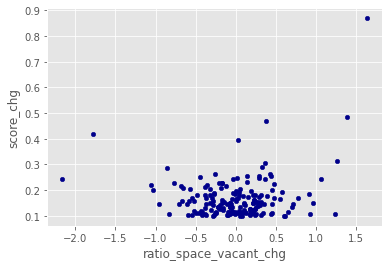

In [67]:
asc_cor=asc[['ratio_space_vacant_chg', 'score_chg']]
asc_cor.plot.scatter(x='ratio_space_vacant_chg',y='score_chg', c='DarkBlue')
#plt.savefig('tplot/p1-cor-asc.png',dpi = 200,bbox_inches = 'tight')

<AxesSubplot:xlabel='ratio_space_vacant_chg', ylabel='score_chg'>

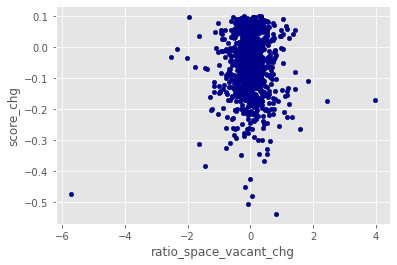

In [68]:
notasc_cor=notasc[['ratio_space_vacant_chg', 'score_chg']]
notasc_cor.plot.scatter(x='ratio_space_vacant_chg',y='score_chg', c='DarkBlue')
#plt.savefig('tplot/p1-cor-nonasc.png',dpi = 200,bbox_inches = 'tight')

In [69]:
#for ascending MSOAs
#calculate Spearman's Rank correlation and corresponding p-value 

rho, p = stats.spearmanr(asc['score_chg'], asc['ratio_space_vacant_chg'])

In [70]:
print(rho)
print(p)

0.023190387978047473
0.7593128418151442


In [71]:
#for non-ascending MSOAs
#calculate Spearman's Rank correlation and corresponding p-value 
rho2, p2 = stats.spearmanr(notasc['score_chg'], notasc['ratio_space_vacant_chg'])

In [72]:
print(rho2)
print(p2)

0.024015880072756162
0.4404528723051673
